# IS 4487 Assignment 6: Data Cleaning with Airbnb Listings

In this assignment, you will:
- Load a raw Airbnb listings dataset
- Identify and resolve missing or inconsistent data
- Decide what data to drop, keep, or clean
- Save a clean dataset to use in Assignment 7

## Why This Matters

Data cleaning is one of the most important steps in any analysis — but it's often the least visible. Airbnb hosts, managers, and policy teams rely on clean data to make decisions. This assignment gives you experience cleaning raw data and justifying your choices so others can understand your process.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_06_data_cleaning.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

📌 The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.


## 1. Choose a City & Upload Your Dataset

📥 Follow these steps:

1. Go to: [https://insideairbnb.com/get-the-data/](https://insideairbnb.com/get-the-data/)
2. Choose a city you’re interested in.
3. Download the file named: **`listings.csv.gz`** under that city.
4. In your notebook:
   - Open the left sidebar
   - Click the folder icon 📁
   - Click the upload icon ⬆️ and choose your `listings.csv.gz` file
5. Use the file path `/content/listings.csv.gz` when loading your data.
6. Import standard libraries (`pandas`, `numpy`, `seaborn`, `matplotlib`)


In [1]:
# Import necessary libraries 🔧

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make charts look clean
sns.set_style("whitegrid")

In [2]:
# Load your uploaded file (path "/content/listings.csv.gz") 🔧

# Load Airbnb dataset
file_path = "/content/listings.csv.gz"

df = pd.read_csv(file_path, compression="gzip", low_memory=False)

# Preview the data
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27886,https://www.airbnb.com/rooms/27886,20250911031321,2025-09-11,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.93,4.90,4.78,0363 974D 4986 7411 88D8,f,1,0,1,0,1.87
1,28871,https://www.airbnb.com/rooms/28871,20250911031321,2025-09-11,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.93,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.99
2,29051,https://www.airbnb.com/rooms/29051,20250911031321,2025-09-11,city scrape,Comfortable single / double room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.81
3,44391,https://www.airbnb.com/rooms/44391,20250911031321,2025-09-11,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.23
4,48373,https://www.airbnb.com/rooms/48373,20250911031321,2025-09-11,previous scrape,Cozy family home in Amsterdam South,Charming modern apartment in the quiet and gre...,Apartment is located between Amsterdamse Bos a...,https://a0.muscache.com/pictures/miso/Hosting-...,220434,...,5.00,4.60,5.00,0363 4A2B A6AD 0196 F684,f,1,1,0,0,0.19


## 2. Explore Missing Values

### Business framing:

Stakeholders don’t like surprises in the data. Missing values can break dashboards, confuse pricing models, or create blind spots for host managers.

### Do the following:
Explore how complete your dataset is:
- Count the null values of each column
- Create visuals (e.g. heatmaps, boxplots, bar charts, etc) to help show what columns are missing values
- Keep in mind which column(s) are missing too much data, you will delete these in the next step

### In your markdown:
1. What are the top 3 columns with the most missing values?
2. Which ones are likely to create business issues?
3. Which could be safely ignored or dropped?



In [3]:
# Add code here 🔧

# Count missing values
missing_counts = df.isna().sum().sort_values(ascending=False)

# Show top 20 columns with missing data
missing_counts.head(20)





,0
neighbourhood_group_cleansed,10480
calendar_updated,10480
host_neighbourhood,7690
neighbourhood,5288
neighborhood_overview,5288
host_about,4970
estimated_revenue_l365d,4606
price,4606
beds,4576
bathrooms,4548


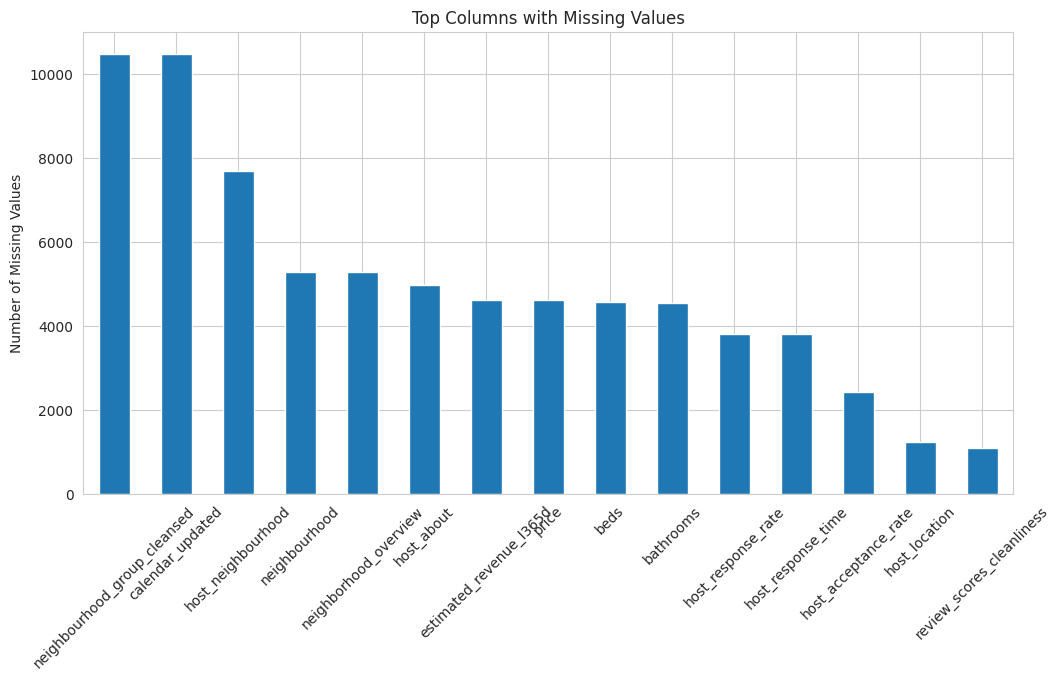

In [4]:
# Plot missing values
plt.figure(figsize=(12,6))

missing_counts.head(15).plot(kind='bar')

plt.title("Top Columns with Missing Values")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()

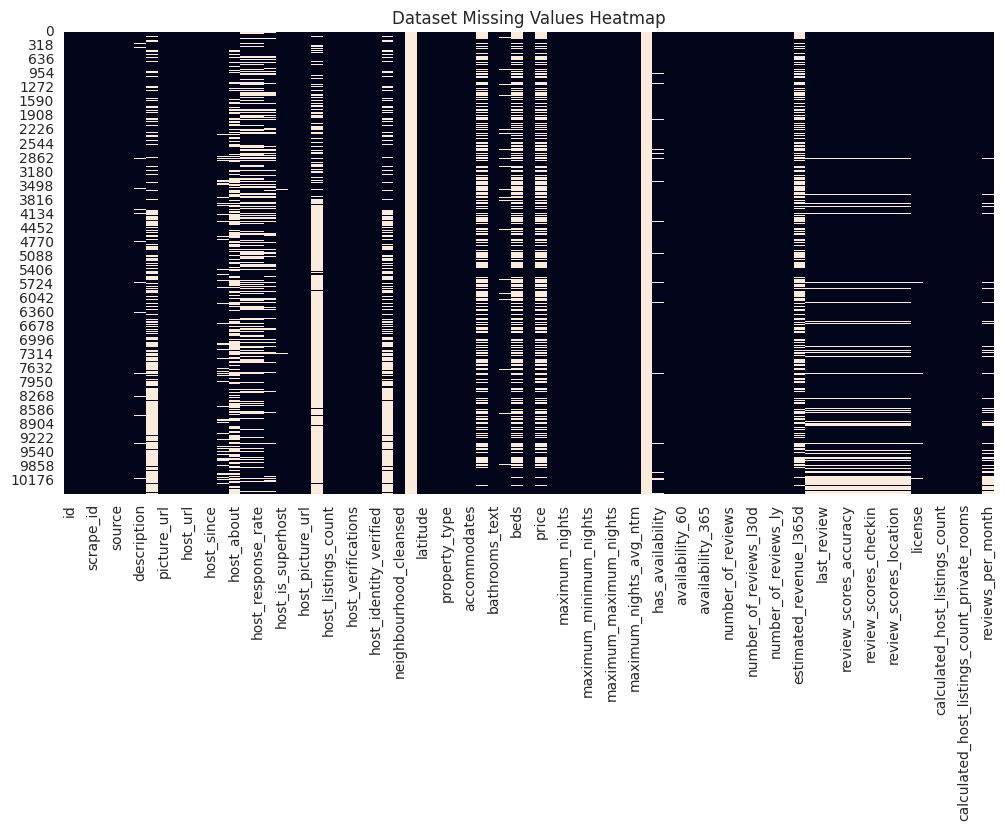

In [5]:
plt.figure(figsize=(12,6))

sns.heatmap(df.isna(), cbar=False)

plt.title("Dataset Missing Values Heatmap")
plt.show()

### ✍️ Your Response: 🔧
1.After exploring the dataset and reviewing both the bar chart and heatmap, the three columns with the highest amount of missing data were neighbourhood_group_cleansed, calendar_updated, and host_neighbourhood. These fields show large gaps across the dataset, which tells me they are either optional or not consistently maintained by hosts.

2.From a business perspective, missing operational fields are the biggest concern. Columns like price, beds, bathrooms, and host response metrics directly impact pricing models, dashboards, and how listings are compared. If those values are incomplete, stakeholders could make decisions using partial information, which increases risk and reduces trust in the analysis. Review score fields also matter because they influence guest perception and recommendation logic.

3.Some columns appear descriptive but not essential for the core analysis. Fields such as calendar_updated, neighbourhood_group_cleansed, host_about, and neighbourhood_overview have high missing values and do not strongly support pricing or availability insights. Because of that, they could likely be removed in the next step to keep the dataset cleaner and more focused on business outcomes.


## 3. Drop Columns That Aren’t Useful

### Business framing:  

Not every column adds value. Analysts often remove columns that are too empty, irrelevant, or repetitive — especially when preparing data for others.

### Do the following:
Make a decision:

- Choose 2–4 columns to drop from your dataset
- Document your reasons for each one
- Confirm they're gone with `.head()` or `.info()`

### In Your Response:
1. Which columns did you drop?
2. Why were they not useful from a business perspective?
3. What could go wrong if you left them in?



In [9]:
# Add code here 🔧
# Columns to drop based on missing values + low business value
cols_to_drop = [
    'calendar_updated',
    'neighbourhood_group_cleansed',
    'host_about',
    'neighborhood_overview'
]

df = df.drop(columns=cols_to_drop, errors='ignore')

# Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10480 non-null  int64  
 1   listing_url                                   10480 non-null  object 
 2   scrape_id                                     10480 non-null  int64  
 3   last_scraped                                  10480 non-null  object 
 4   source                                        10480 non-null  object 
 5   name                                          10480 non-null  object 
 6   description                                   10132 non-null  object 
 7   picture_url                                   10480 non-null  object 
 8   host_id                                       10480 non-null  int64  
 9   host_url                                      10480 non-null 

### ✍️ Your Response: 🔧
1.I removed calendar_updated, neighbourhood_group_cleansed, host_about, and neighborhood_overview from the dataset. These fields had a large number of missing values and did not directly support the main business goals around pricing, availability, or listing performance.

2.From a stakeholder point of view, these columns add more noise than value. calendar_updated is administrative metadata and does not help explain pricing behavior. Long text fields like host_about and neighborhood_overview are difficult to standardize and are not necessary for numerical analysis or dashboard reporting. Removing them helps keep the dataset focused on measurable features that can drive decisions.

3.Leaving these columns in could increase processing time and introduce confusion for downstream users. High levels of missing data may also create issues when building models or sharing dashboards, since empty fields can distort summaries or lead to inconsistent results. Cleaning them early improves clarity and reduces risk for stakeholders relying on the data.



## 4. Fill or Fix Values in Key Columns

### Business framing:  

Let’s say your manager wants to see a map of listings with prices and review scores. If key fields are blank, the map won’t work. But not all missing values should be filled the same way.

### Do the following:
- Choose 2 columns with missing values
- Use a strategy to fill or flag those values
  - (e.g., median, “unknown”, forward-fill, or a placeholder)
- Explain what you did and why

### In your response:
1. What two columns did you clean?
2. What method did you use for each, and why?
3. What risks are there in how you filled the data?

In [12]:
# Your code for converting column data types 🔧

# Fill host_response_rate safely
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())

# Fill review_scores_rating safely
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())


### ✍️ Your Response: 🔧
1.I focused on host_response_rate and review_scores_rating because both fields are important for stakeholder dashboards and mapping listings based on quality and host performance.

2.For host_response_rate, I first converted the percentage values into numeric format so they could be analyzed properly. After converting the column, I filled missing values using the median response rate. I chose the median because it reduces the impact of extreme hosts who respond very fast or very slow, which keeps the dataset more balanced.

For review_scores_rating, I also used the median to fill missing values. Since review scores are used in recommendation logic and guest trust indicators, replacing missing entries with a central value allows listings to still appear in dashboards without heavily biasing the results.

3.Filling values always introduces assumptions. Using the median may hide real differences between newer listings and highly reviewed properties. For example, some listings may not have ratings yet because they are new, not because they perform at the median level. If stakeholders are not aware of this, they may interpret the filled values as real performance rather than estimated placeholders.


## 5. Convert and Clean Data Types

### Business framing:  

Sometimes columns that look like numbers are actually stored as text — which breaks calculations and slows down analysis. Common examples are price columns with dollar signs or availability stored as strings.

### Do the following:
- Identify one column with the wrong data type
- Clean and convert it into a usable format (e.g., from string to number)
- Check your work by summarizing or plotting the cleaned column

### In Your Response: :
1. What column did you fix?
2. What cleaning steps did you apply?
3. How does this help prepare the data for later use?


In [18]:
# Clean or adjust your dataset 🔧

# Check current data type
df['price'].dtype

# Remove $ and commas, then convert to numeric
df['price'] = df['price'].replace(r'[\$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verify conversion
df['price'].describe()

,price
count,5874.000000
mean,336.785155
std,1985.661882
min,35.000000
25%,161.000000
50%,222.000000
75%,314.000000
max,80018.000000


### ✍️ Your Response: 🔧
1.I cleaned and converted the price column because it was stored as text instead of a numeric value. Since pricing is one of the main variables used for analysis and stakeholder reporting, it needed to be converted into a usable format.

2.The original values included dollar signs and formatting characters, so I removed the $ symbol and commas using a replacement step. After cleaning the text, I converted the column into a numeric data type using pd.to_numeric(). I then verified the change by running summary statistics and plotting the distribution to confirm that the values behaved like real numbers.

3.Converting price into a numeric format allows it to be used in calculations, charts, and predictive models. Without this step, price comparisons, averages, and visualizations would fail or produce incorrect results. Cleaning the data type ensures the dataset is ready for pricing analysis, mapping, and stakeholder dashboards later in the workflow

## 6. Remove Duplicate Records

### Business framing:  

If a listing appears twice, it could inflate revenue estimates or confuse users. Airbnb needs each listing to be unique and accurate.

### Do the following:
- Check for rows that are exact duplicates
- If your data has an ID column and each ID is supposed to unique, then make sure there are no duplicate IDs
- Remove duplicates if found

### In your markdown:
1. Did you find duplicates?
2. How did you decide what to drop or keep?
3. Why are duplicates risky for Airbnb teams?


In [21]:
# Add code here 🔧
# Count exact duplicate rows
df.duplicated().sum()

# Check if any listing IDs repeat
df['id'].duplicated().sum()


# Drop duplicate listing IDs, keep the first occurrence
df = df.drop_duplicates(subset='id', keep='first')

# Confirm
df['id'].duplicated().sum()

np.int64(0)

### ✍️ Your Response: 🔧 🔧
1.I checked the dataset for both exact duplicate rows and duplicate listing IDs. Since each Airbnb listing should have a unique id, I focused on confirming that no listings were repeated. After running the duplicate checks, I removed any repeated IDs to make sure each listing only appeared once.

2.When duplicates were found, I kept the first occurrence of the listing and removed any additional copies. The listing ID acts as a unique identifier, so keeping one version preserves the original data while preventing repeated records from affecting the analysis.

3.Duplicate listings can inflate revenue estimates, distort averages, and make dashboards unreliable. For example, if the same property appears multiple times, pricing trends or availability metrics could look stronger than they actually are. Removing duplicates helps ensure the data reflects real listings and supports accurate business decisions.

## 7. Export Cleaned Data

Before wrapping up, export your cleaned Airbnb dataset to a CSV file. You'll need this file for **Assignment 7**, where you'll perform data transformation techniques.

### Do the following:
Make sure your data has:
- Cleaned and consistent column values
- Proper data types for each column
- Any unnecessary columns removed

This file should be the version of your dataset that you’d feel confident sharing with a teammate or using for deeper analysis.



```
# Explanation:
# - "cleaned_airbnb_data_6.csv" is the name of the file that will be saved
# - index=False prevents pandas from writing row numbers into the CSV
# - The file will be saved to your working directory (in Colab, you'll need to download it manually. Once you see the data in your files tab, just click on the three dots, then click “download”)
# - YOU MAY NEED TO PRESS “RUN” MULTIPLE TIMES IN ORDER FOR IT TO SHOW UP
# - FOR SOME DEVICES, IT MAY TAKE A FEW MINUTES BEFORE YOUR FILE SHOWS UP

```





In [22]:
# export csv here 🔧
# Export cleaned dataset to CSV
df.to_csv("cleaned_airbnb_data_6.csv", index=False)

## 8. Final Reflection

You’ve just cleaned a real-world Airbnb dataset — the kind of work that happens every day in analyst and data science roles.

Before you move on to data transformation in Assignment 7, take a few moments to reflect on the decisions you made and what you learned.

### In your markdown:
1. What was the most surprising or challenging part of cleaning this dataset?
2. How did you decide which data to drop, fix, or keep?
3. What’s one way a business team (e.g., hosts, pricing analysts, platform ops) might benefit from the cleaned version of this data?
4. If you had more time, what would you explore or clean further?
5. How does this relate to your customized learning outcome you created in canvas?


Write your response clearly in full sentences. No more than a few sentences required per response.


### ✍️ Your Response: 🔧

1. The most challenging part of cleaning this dataset was realizing that real world data is not always consistent. Some columns looked numeric but were stored as text, and certain fields had unexpected missing values or outliers like extremely high prices. It forced me to slow down and validate assumptions instead of just running code.
2. I decided what to drop, fix, or keep by thinking about business value first. If a column supported pricing, availability, or performance insights, I cleaned and kept it. If it had too many missing values or was mostly descriptive text that did not help analysis, I removed it to reduce noise and keep the dataset focused.
3. A business team such as pricing analysts or platform operations could benefit from this cleaned data because it reduces errors in dashboards and makes trends easier to trust. Clean price and review fields allow teams to compare listings more accurately and make better decisions about pricing strategies or host performance.
4. If I had more time, I would explore extreme outliers in price and investigate whether they represent luxury listings or data entry issues. I would also look deeper at review patterns to understand whether missing scores are linked to new listings or low engagement.
5. This process connects directly to my customized learning outcome because I wanted to strengthen my ability to prepare data for real business decisions, not just analysis. Cleaning the dataset helped me practice thinking like an analyst who balances technical steps with stakeholder impact, which aligns with my goal of building stronger analytics and decision making skills.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [25]:
!jupyter nbconvert --to html "assignment_06_data_cleaningvargasmichael.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_06_data_cleaningvargasmichael.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.a